In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34','column 35','column 36','column 37','column 38','column 39','column 40','column 41','column 42','column 43','column 44','column 45','column 46','column 47','column 48','column 49','column 50','column 51','column 52','column 53','column 54','column 55','column 56','column 57']
df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Incomplete Datasets\Incomplete Datasets Without Labels\Spam\Spam_NE_10.xlsx.', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.000,0.0,0.778,0.000,0.000,3.756,61.0,NaN
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,NaN,0.94,...,0.0,0.0,0.132,0.0,0.372,0.180,0.048,5.114,101.0,1028.0
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,NaN,0.31,0.63,...,0.0,0.0,0.135,NaN,NaN,NaN,0.000,3.537,40.0,191.0
3,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.0,0.0,0.223,0.0,0.000,NaN,0.000,3.000,15.0,54.0
4,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.0,0.0,0.054,0.0,0.164,0.054,NaN,1.671,4.0,112.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.00,0.64,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.0,0.348,0.0,NaN,0.000,0.000,3.121,NaN,103.0
4593,0.00,0.00,0.00,0.0,NaN,0.00,NaN,NaN,0.00,0.00,...,0.0,0.0,0.000,0.0,0.000,0.000,NaN,3.043,15.0,70.0
4594,0.00,0.00,NaN,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,NaN,0.0,0.136,NaN,0.000,0.000,NaN,1.837,12.0,NaN
4595,0.17,NaN,NaN,0.0,0.34,0.34,0.00,0.00,0.00,0.00,...,0.0,0.0,0.032,0.0,0.065,0.000,0.000,1.189,5.0,69.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
float64		column 1	522
float64		column 2	406
float64		column 3	551
float64		column 4	464
float64		column 5	493
float64		column 6	493
float64		column 7	526
float64		column 8	580
float64		column 9	468
float64		column 10	406
float64		column 11	464
float64		column 12	319
float64		column 13	435
float64		column 14	410
float64		column 15	377
float64		column 16	439
float64		column 17	410
float64		column 18	555
float64		column 19	348
float64		column 20	493
float64		column 21	439
float64		column 22	410
float64		column 23	613
float64		column 24	497
float64		column 25	493
float64		column 26	290
float64		column 27	584
float64		column 28	352
float64		column 29	526
float64		column 30	584
float64		column 31	439
float64		column 32	468
float64		column 33	526
float64		column 34	406
float64		column 35	406
float64		column 36	584
float64		column 37	261
float64		column 38	497
float64		column 39	439
float64		column 40	439
float64		column 41	522
float64		column 42	464
float

In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
count,4075.000000,4191.000000,4046.000000,4133.000000,4104.000000,4104.000000,4071.000000,4017.000000,4129.000000,4191.000000,...,4071.000000,4129.000000,4245.000000,4187.000000,4191.000000,4104.000000,4162.000000,4071.000000,4220.000000,4075.000000
mean,0.096380,0.203624,0.269854,0.071742,0.295507,0.088204,0.101638,0.094859,0.083580,0.232217,...,0.028438,0.033468,0.136577,0.015349,0.255006,0.069764,0.039071,4.674868,52.034360,268.736442
std,0.287722,1.266093,0.486218,1.471412,0.640165,0.268311,0.360214,0.384359,0.272602,0.646478,...,0.265678,0.214144,0.269277,0.107869,0.759242,0.229482,0.385840,29.661292,199.652909,597.005378
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.600000,6.000000,35.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.067000,0.000000,0.000000,0.000000,0.000000,2.293000,15.000000,97.000000
75%,0.000000,0.000000,0.400000,0.000000,0.360000,0.000000,0.000000,0.000000,0.000000,0.140000,...,0.000000,0.000000,0.183000,0.000000,0.309500,0.049000,0.000000,3.715500,44.000000,255.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


<AxesSubplot:>

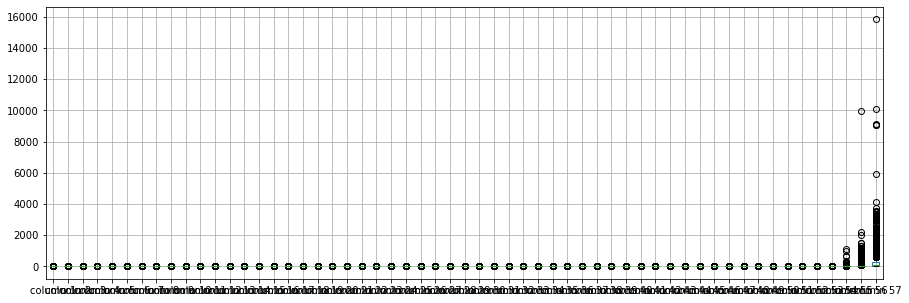

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1       0.096380
column 2       0.203624
column 3       0.269854
column 4       0.071742
column 5       0.295507
column 6       0.088204
column 7       0.101638
column 8       0.094859
column 9       0.083580
column 10      0.232217
column 11      0.053881
column 12      0.535096
column 13      0.087951
column 14      0.052766
column 15      0.045863
column 16      0.245190
column 17      0.135202
column 18      0.176591
column 19      1.641760
column 20      0.073248
column 21      0.786984
column 22      0.114225
column 23      0.094312
column 24      0.085454
column 25      0.488494
column 26      0.262280
column 27      0.670242
column 28      0.112544
column 29      0.089764
column 30      0.089539
column 31      0.058485
column 32      0.044316
column 33      0.084829
column 34      0.043644
column 35      0.095724
column 36      0.084199
column 37      0.132791
column 38      0.011415
column 39      0.071590
column 40      0.059885
column 41      0.039823
column 42      0

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
column 1,1.000000,-0.009765,0.073493,0.021899,0.031869,0.062402,-0.002821,0.001067,0.099462,0.042285,...,-0.020157,-0.020431,-0.013456,-0.031496,0.068374,0.105078,-0.003880,0.034639,0.054582,0.079370
column 2,-0.009765,1.000000,-0.029355,-0.006592,-0.022127,-0.022230,0.000916,-0.013415,-0.000388,0.028337,...,-0.017099,-0.009904,-0.048140,-0.016053,-0.013598,-0.006126,0.004846,0.002327,0.001899,-0.019773
column 3,0.073493,-0.029355,1.000000,-0.017780,0.068739,0.074224,0.041563,0.019328,0.093786,0.038372,...,-0.020928,-0.033230,-0.026850,-0.032432,0.103325,0.103086,0.000845,0.067199,0.096136,0.071158
column 4,0.021899,-0.006592,-0.017780,1.000000,0.011071,-0.014838,0.024991,0.002601,-0.001785,-0.005158,...,-0.005249,0.000522,-0.012491,-0.006802,-0.002436,0.005807,-0.001391,0.006525,0.022603,0.017570
column 5,0.031869,-0.022127,0.068739,0.011071,1.000000,0.049730,0.171140,0.019878,0.023375,0.041180,...,-0.026440,-0.032814,-0.047950,-0.030827,0.043056,0.045137,0.009592,0.038659,0.052485,0.007998
column 6,0.062402,-0.022230,0.074224,-0.014838,0.049730,1.000000,0.046552,0.094002,0.106381,0.004901,...,-0.030964,-0.016495,-0.003625,-0.009140,0.062996,0.092951,0.002900,-0.006085,0.074765,0.072567
column 7,-0.002821,0.000916,0.041563,0.024991,0.171140,0.046552,1.000000,0.031134,0.030453,0.051021,...,-0.029276,-0.029668,-0.046441,-0.025367,0.053731,0.079750,0.049441,0.019838,0.053558,-0.003060
column 8,0.001067,-0.013415,0.019328,0.002601,0.019878,0.094002,0.031134,1.000000,0.099989,0.066012,...,-0.020126,-0.026125,-0.028534,-0.017923,0.032872,0.058516,-0.004847,0.010494,0.035767,0.044049
column 9,0.099462,-0.000388,0.093786,-0.001785,0.023375,0.106381,0.030453,0.099989,1.000000,0.148779,...,-0.025453,-0.011288,-0.026069,-0.003145,0.043994,0.149249,0.003022,0.087761,0.166968,0.231167
column 10,0.042285,0.028337,0.038372,-0.005158,0.041180,0.004901,0.051021,0.066012,0.148779,1.000000,...,-0.020983,0.007731,0.003957,0.006227,0.031860,0.071397,0.043304,0.060228,0.092200,0.080119


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [17,17+78,17+78+78,17+78+78+78,17+78+78,17+78,17], vae_layer = False, seed = 780)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [57]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 579.894648907492
Epoch: 1 , loss: 576.4337190103032
Epoch: 2 , loss: 577.4440351745393
Epoch: 3 , loss: 573.9724489006015
Epoch: 4 , loss: 573.3608315231908
Epoch: 5 , loss: 577.3669856267524
Epoch: 6 , loss: 572.4273961562313
Epoch: 7 , loss: 568.8290052513628
Epoch: 8 , loss: 575.2687765513563
Epoch: 9 , loss: 569.3135358963278
Epoch: 10 , loss: 544.1925928468073
Epoch: 11 , loss: 464.1047547769048
Epoch: 12 , loss: 454.21918912880926
Epoch: 13 , loss: 444.3120094857565
Epoch: 14 , loss: 423.4000558620546
Epoch: 15 , loss: 411.89567393126805
Epoch: 16 , loss: 401.4916962414253
Epoch: 17 , loss: 396.4345186346499
Epoch: 18 , loss: 385.12118349507296
Epoch: 19 , loss: 387.0691347022505
Epoch: 20 , loss: 404.72136066184225
Epoch: 21 , loss: 374.73154428196284
Epoch: 22 , loss: 397.5154901697245
Epoch: 23 , loss: 383.27699378143205
Epoch: 24 , loss: 385.73279837365766
Epoch: 25 , loss: 389.7163579322735


In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(4597, 57)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      0.000000
column 2      0.000000
column 3      0.000000
column 4      0.000000
column 5      0.102990
column 6      0.000000
column 7      0.000000
column 8      0.000000
column 9      0.000000
column 10     0.000000
column 11     0.000000
column 12     0.000000
column 13     0.000000
column 14     0.000000
column 15     0.000000
column 16     0.000000
column 17     0.040189
column 18     0.000000
column 19     1.083087
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.219982
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     0.000000
column 32     0.000000
column 33     0.142626
column 34     0.000000
column 35     0.000000
column 36     0.000000
column 37     0.000000
column 38     0.000000
column 39     0.000000
column 40     0.000000
column 41     0.000000
column 42     0.000000
column 43     0.000000
column 44  

In [12]:
complete_df=pd.read_excel(r'C:\Users\Jaber Shahnawaz\Downloads\Original Datasets (1)\Original Datasets Without Labels\Spam.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-89.120499
1,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,-0.443455,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
2,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,-0.579218,0.000000,0.0,...,0.000000,0.0,0.0,-0.053333,0.080013,-0.026586,0.000000,0.0,0.000000,0.000000
3,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,-0.037350,0.000000,0.0,0.000000,0.000000
4,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,-0.097483,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,-1.025431,0.000000,0.000000,0.0,-10.994339,0.000000
4593,0.0,0.000000,0.000000,0.0,0.197866,0.0,0.077601,0.105777,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,-0.201851,0.0,0.000000,0.000000
4594,0.0,0.000000,0.029599,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,-0.156167,0.0,0.0,-0.099860,0.000000,0.000000,-0.659027,0.0,0.000000,47.903900
4595,0.0,0.097393,-0.507851,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
numerator

15215.886736540206

In [17]:
denominator=Frobenius_norm(complete_df)
denominator

47458.653692284744

In [18]:
NRMS=numerator/denominator
NRMS


0.3206135352089396

In [19]:
new_df.iloc[66,:]

column 1       0.000000
column 2       0.440000
column 3       0.890000
column 4       0.000000
column 5       0.440000
column 6       0.000000
column 7       0.383176
column 8       0.000000
column 9       0.000000
column 10      0.000000
column 11      0.000000
column 12      0.440000
column 13      0.000000
column 14      0.000000
column 15      0.000000
column 16      0.329558
column 17      0.349023
column 18      0.944680
column 19      2.240000
column 20      0.000000
column 21      0.851315
column 22      0.000000
column 23      0.000000
column 24      0.000000
column 25      0.000000
column 26      0.000000
column 27      0.000000
column 28      0.000000
column 29      0.000000
column 30     -0.119368
column 31      0.000000
column 32      0.000000
column 33      0.367521
column 34      0.000000
column 35      0.000000
column 36      0.000000
column 37      0.000000
column 38      0.000000
column 39      0.000000
column 40      0.000000
column 41      0.000000
column 42      0

In [20]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 48,column 49,column 50,column 51,column 52,column 53,column 54,column 55,column 56,column 57
0,0.00,0.640000,0.640000,0.0,0.320000,0.00,0.000000,0.000000,0.000000,0.00,...,0.000000,0.0,0.000,0.000000,0.778000,0.000000,0.000000,3.756,61.000000,188.879501
1,0.21,0.280000,0.500000,0.0,0.140000,0.28,0.210000,0.070000,-0.443455,0.94,...,0.000000,0.0,0.132,0.000000,0.372000,0.180000,0.048000,5.114,101.000000,1028.000000
2,0.00,0.000000,0.000000,0.0,0.630000,0.00,0.310000,0.050782,0.310000,0.63,...,0.000000,0.0,0.135,-0.053333,0.215013,-0.026586,0.000000,3.537,40.000000,191.000000
3,0.00,0.000000,0.000000,0.0,1.850000,0.00,0.000000,1.850000,0.000000,0.00,...,0.000000,0.0,0.223,0.000000,0.000000,-0.037350,0.000000,3.000,15.000000,54.000000
4,0.00,0.000000,0.000000,0.0,1.920000,0.00,0.000000,0.000000,0.000000,0.64,...,0.000000,0.0,0.054,0.000000,0.164000,0.054000,-0.097483,1.671,4.000000,112.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,0.00,0.000000,0.640000,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,0.000000,0.0,0.348,0.000000,0.134569,0.000000,0.000000,3.121,4.005661,103.000000
4593,0.00,0.000000,0.000000,0.0,0.197866,0.00,0.077601,0.105777,0.000000,0.00,...,0.000000,0.0,0.000,0.000000,0.000000,0.000000,-0.201851,3.043,15.000000,70.000000
4594,0.00,0.000000,0.029599,0.0,0.000000,0.00,0.000000,0.000000,0.000000,0.00,...,-0.156167,0.0,0.136,-0.099860,0.000000,0.000000,-0.250027,1.837,12.000000,115.903900
4595,0.17,0.097393,0.172149,0.0,0.340000,0.34,0.000000,0.000000,0.000000,0.00,...,0.000000,0.0,0.032,0.000000,0.065000,0.000000,0.000000,1.189,5.000000,69.000000


In [21]:
imputations[-1].to_excel("Spam_NE_10(imp).xlsx", index=False, header=False)